In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from support_functions import *

In [22]:
#Import data and give column names

train = pd.read_csv('../../data/feature_selected_train_FD001.csv', sep=',', header=0, engine='python')
test = pd.read_csv('../../data/feature_selected_test_FD001.csv', sep=',', header=0, engine='python')
y_test = pd.read_csv('../../data/RUL_FD001.csv', sep=',', header=0,  engine='python')

index_names = train.columns[[0, 1]]
setting_names = train.columns[[2]]
sensor_names = train.drop(index_names.union(setting_names), axis = 1).columns # Find something better than union!!
scale_columns = sensor_names
keep_columns = scale_columns.union(index_names[[1]])

In [23]:
x_train = add_remaining_useful_life(train)
y_train = x_train.pop('RUL')
x_test = test.groupby(by="unit_no").last().reset_index()
x_train_scaled, x_test_scaled = scale_data(x_train, x_test, scale_columns)

In [24]:
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)
y_hat_train = reg.predict(x_train_scaled)
evaluate(y_train, y_hat_train, 'Train')

y_hat_test = reg.predict(x_test_scaled)
evaluate(y_test, y_hat_test, 'Test')

Train set RMSE:39.59310521746384, R2:0.669583736222076
Test set RMSE:31.588573847431114, R2:0.4221694575464129


(31.588573847431114, 0.4221694575464129)

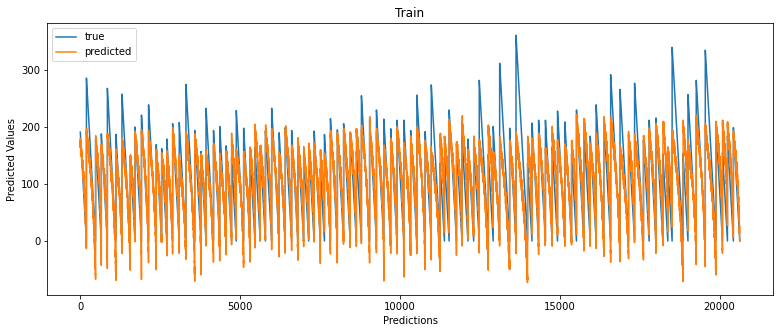

In [25]:
plot_predictions(y_train, y_hat_train)

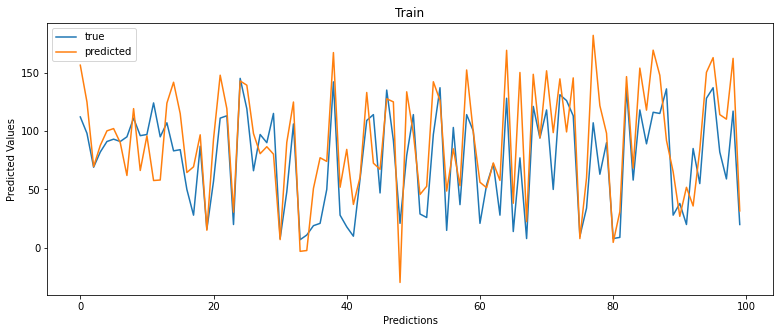

In [26]:
plot_predictions(y_test, y_hat_test)